 Activites List

Here are some of the tasks you need to perform:

### Activity 1

- Aggregate data into one Data Frame using Pandas.
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates
- Replacing null values – Replace missing values with means of the column (for numerical columns)

### Activity 2

- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- Standardizing the data – Use string functions to standardize the text data (lower case)

### Activity 3

- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)).
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function/functions.

### Activity 4

- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

### Activity 5

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- Normalize (numericals)
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

- Bonus: split Data set into train and test sets

### Activity 6

#### Processing Data

(_Further processing..._)
- X-y split.
- Normalize (numerical). (_done_)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

#### Linear Regression

- Train-test split.
- Apply linear regression.

#### Model Validation

- Description:
  - MSE.
  - RMSE.
  - MAE.
  - R2.



# Activites List

Here are some of the tasks you need to perform:

### Activity 1

- [x] Aggregate data into one Data Frame using Pandas.
- [x] Standardizing header names
- [x] Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- [x] Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints)
- [x] Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- [x] Removing duplicates
- [x] Replacing null values – Replace missing values with means of the column (for numerical columns)

In [114]:
# setup libraries
import pandas as pd
import numpy as np

In [115]:
# setup

 create useful check function for everytime it needs to
 check for value uniqueness and counting

In [116]:
def check_series(data_frame,serie_name):
    print('\nvalue counts:\n',data_frame[serie_name].value_counts())
    print('\nunique:\n',data_frame[serie_name].unique())
    print('\n',data_frame[serie_name].describe())

In [117]:
# read files
file_1 = pd.read_csv('Data/file1.csv').rename(columns={'ST': 'State', 'GENDER':'Gender'})

file_2 = pd.read_csv('Data/file2.csv').rename(columns={'ST': 'State', 'GENDER':'Gender'})

file_3 = pd.read_csv('Data/file3.csv')

# second file
file_4 = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [118]:
# combine data
#data = pd.concat([file_1, file_2, file_3]).reindex()
data = pd.concat([file_1, file_2, file_3, file_4]).reindex()
data.columns

Index(['Customer', 'State', 'Gender', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount', 'Unnamed: 0',
       'Response', 'Coverage', 'Effective To Date', 'EmploymentStatus',
       'Location Code', 'Marital Status', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

##### the number of columns show doubles columns for state and gender
> first copy all data in preferd column eg. Gender and State
>
> delete old double Columns "ST" and "GENDER"

In [119]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,...,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy,Renew Offer Type,Sales Channel,Vehicle Size,Vehicle Type
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,F,Bachelor,15563.36944,0.0,253.0,NaN,Personal Auto,Luxury Car,...,Suburban,Married,NaN,40.0,7.0,Personal L1,Offer3,Web,Medsize,A
10906,KX53892,Oregon,F,College,5259.444853,61146.0,65.0,0.0,Personal Auto,Four-Door Car,...,Urban,Married,7.0,68.0,6.0,Personal L3,Offer2,Branch,Medsize,A
10907,TL39050,Arizona,F,Bachelor,23893.3041,39837.0,201.0,0.0,Corporate Auto,Luxury SUV,...,Rural,Married,11.0,63.0,2.0,Corporate L3,Offer1,Web,Medsize,NaN
10908,WA60547,California,F,College,11971.97765,64195.0,158.0,4.0,Personal Auto,SUV,...,Urban,Divorced,0.0,27.0,6.0,Personal L1,Offer1,Branch,Medsize,A


In [120]:
data['Customer'].value_counts()
data['Customer'].duplicated().value_counts()

True     13849
False     9135
Name: Customer, dtype: int64

In [121]:
data['Gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [122]:
#data['Gender'] = list(map(lambda x, y: x if x == x else y, data['Gender'],data['GENDER']))
#data['State'] = list(map(lambda x, y: x if x == x else y, data['State'], data['ST']))

# drop GENDER and ST as it is double information
#data.drop(columns=['ST','GENDER'], inplace=True)

##### ***Step:*** getting an overwiew which kind of values are in data for Gender and State
>***decision:***
>
> - stay with M as Male and F as Female
>

In [123]:
# which kind of values are in Gender
data['Gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [124]:
F = ['Femal', 'female', 'F']
M = ['Male', 'M']
data['Gender'] = list(map(lambda x: 'M' if x==x and x in M else ('F' if x==x and x in F else np.nan), data['Gender']))

In [125]:
# check result
check_series(data, 'Gender')
print('null in Gender:',data['Gender'].isnull().sum())


value counts:
 F    10180
M     9745
Name: Gender, dtype: int64

unique:
 [nan 'F' 'M']

 count     19925
unique        2
top           F
freq      10180
Name: Gender, dtype: object
null in Gender: 3059


- Gender has still 3059 null values, 
- this will be adressed after removing doubles and cleaning other stuff, so that some of these fields will be allready removed

#### State

In [126]:
# fix State values
check_series(data, 'State')
data.isna().count()


value counts:
 California    6584
Oregon        5510
Arizona       3567
Nevada        1875
Washington    1656
Cali           120
AZ              74
WA              30
Name: State, dtype: int64

unique:
 ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA'
 nan]

 count          19416
unique             8
top       California
freq            6584
Name: State, dtype: object


Customer                         22984
State                            22984
Gender                           22984
Education                        22984
Customer Lifetime Value          22984
Income                           22984
Monthly Premium Auto             22984
Number of Open Complaints        22984
Policy Type                      22984
Vehicle Class                    22984
Total Claim Amount               22984
Response                         22984
Coverage                         22984
Effective To Date                22984
EmploymentStatus                 22984
Location Code                    22984
Marital Status                   22984
Months Since Last Claim          22984
Months Since Policy Inception    22984
Number of Policies               22984
Policy                           22984
Renew Offer Type                 22984
Sales Channel                    22984
Vehicle Size                     22984
Vehicle Type                     22984
dtype: int64

as visible, States needed to be renamed to get a clear standard

In [127]:
# running lambda map fuctions to set all states in similar standard

data['State'] = list(map(lambda x: x if x != 'AZ' else 'Arizona', data['State']))
data['State'] = list(map(lambda x: x if x != 'Cali' else 'California', data['State']))
data['State'] = list(map(lambda x: x if x != 'WA' else 'Washington', data['State']))

In [128]:
check_series(data, 'State')


value counts:
 California    6704
Oregon        5510
Arizona       3641
Nevada        1875
Washington    1686
Name: State, dtype: int64

unique:
 ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' nan]

 count          19416
unique             5
top       California
freq            6704
Name: State, dtype: object


In [129]:
data['State'].isnull().sum()

3568

still 2937 states as null, silimar workflow like with Gender field

#### Customer Lifetime Value

In [130]:
check_series(data, 'Customer Lifetime Value')


value counts:
 5504.139033    16
13727.79972    16
9095.049868    15
5107.163002    15
4250.282624    15
               ..
604261.85%      1
338720.33%      1
1086427.49%     1
884265.00%      1
2771.663013     1
Name: Customer Lifetime Value, Length: 9964, dtype: int64

unique:
 [nan '697953.59%' '1288743.17%' ... 19776.56654 4547.892543 2771.663013]

 count     20040.000000
unique     9964.000000
top        5504.139033
freq         16.000000
Name: Customer Lifetime Value, dtype: float64


> fields show that some values are represented with percent sign
>
> this getting removed with string operation
>
> afterwards the series is casted as float datatype

In [131]:
#remove percent value and cast to float
data['Customer Lifetime Value'] = list(map(lambda x: float(str(x).strip('%\r\t\n')) if x==x else float(0), data['Customer Lifetime Value']))

# convert to float and round with 2 decimal
data['Customer Lifetime Value'] = data['Customer Lifetime Value'].astype('float').round(2)

# debug
print(data.dtypes)
print()
check_series(data, 'Customer Lifetime Value')

Customer                          object
State                             object
Gender                            object
Education                         object
Customer Lifetime Value          float64
Income                           float64
Monthly Premium Auto             float64
Number of Open Complaints         object
Policy Type                       object
Vehicle Class                     object
Total Claim Amount               float64
Response                          object
Coverage                          object
Effective To Date                 object
EmploymentStatus                  object
Location Code                     object
Marital Status                    object
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Policies               float64
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Vehicle Size                      object
Vehicle Type    

In [132]:
data

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,...,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy,Renew Offer Type,Sales Channel,Vehicle Size,Vehicle Type
0,RB50392,Washington,NaN,Master,0.00,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,F,Bachelor,15563.37,0.0,253.0,NaN,Personal Auto,Luxury Car,...,Suburban,Married,NaN,40.0,7.0,Personal L1,Offer3,Web,Medsize,A
10906,KX53892,Oregon,F,College,5259.44,61146.0,65.0,0.0,Personal Auto,Four-Door Car,...,Urban,Married,7.0,68.0,6.0,Personal L3,Offer2,Branch,Medsize,A
10907,TL39050,Arizona,F,Bachelor,23893.30,39837.0,201.0,0.0,Corporate Auto,Luxury SUV,...,Rural,Married,11.0,63.0,2.0,Corporate L3,Offer1,Web,Medsize,NaN
10908,WA60547,California,F,College,11971.98,64195.0,158.0,4.0,Personal Auto,SUV,...,Urban,Divorced,0.0,27.0,6.0,Personal L1,Offer1,Branch,Medsize,A


#### Number of Open Complaints

> looks like one format is just the number '0...5' and second format is '1/0...5/00' eg. '1/2/00'
>
> remove with string operation '1/' and '/00' from string


In [133]:
# checking NaN 
data['Number of Open Complaints'].isna().sum()

3570

In [134]:
# as NaN included in this field, so it is needed to fill these field
# otherwise the string operation will throw an error
data.loc[data['Number of Open Complaints'].isnull()] = 0

data['Number of Open Complaints'] = list(map(lambda x: int(x[2]) if x==x and str(x).startswith('1/') and str(x).endswith('/00') else int(x), data['Number of Open Complaints']))

# use pandas function to cast series to numbers
pd.to_numeric(data['Number of Open Complaints'], errors='coerce')

# check result
check_series(data, 'Number of Open Complaints')


value counts:
 0    18985
1     2157
2      790
3      614
4      314
5      124
Name: Number of Open Complaints, dtype: int64

unique:
 [0 2 1 3 5 4]

 count    22984.000000
mean         0.324356
std          0.848558
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Number of Open Complaints, dtype: float64


#### Education

In [135]:
check_series(data, 'Education')


value counts:
 Bachelor                5806
College                 5693
High School or Below    5579
0                       3570
Master                  1586
Doctor                   726
Bachelors                 24
Name: Education, dtype: int64

unique:
 ['Master' 'Bachelor' 'High School or Below' 'College' 'Bachelors' 'Doctor'
 0]

 count        22984
unique           7
top       Bachelor
freq          5806
Name: Education, dtype: object


> just some small adjustment needed, to keep 'Bachelor' aligned

In [136]:
# replace 'Bachelors' with 'Bachelor'
data['Education'] = list(map(lambda x: x if x != 'Bachelors' else 'Bachelor', data['Education']))

check_series(data, 'Education')


value counts:
 Bachelor                5830
College                 5693
High School or Below    5579
0                       3570
Master                  1586
Doctor                   726
Name: Education, dtype: int64

unique:
 ['Master' 'Bachelor' 'High School or Below' 'College' 'Doctor' 0]

 count        22984
unique           6
top       Bachelor
freq          5830
Name: Education, dtype: object


As shown in the check function, there are still 2937 entries without education information.
Which will adressed after doublicate removement

#### Duplicates

> find and remove all Duplicate entries
> - this is the reason to kept 'Customer' as long as possible, as it could helpfull
> - if customer would be deleted first could cause that entries with similar values or in case less entries values became a duplicate

In [137]:
data.duplicated().sum()

3599

amount of duplicates fits more or less to number count of 0 and NaN entries of previous entries

*check duplicates entries:*

In [138]:
data[data.duplicated()]

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,...,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy,Renew Offer Type,Sales Channel,Vehicle Size,Vehicle Type
1072,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
1073,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
1074,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
1075,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
1076,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
10816,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
10833,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0
10834,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0


> the majority of duplicated values are just zero entries
>
> to confirm the last three entries, we will double check in the customer series

In [139]:
check_series(data, 'Customer')


value counts:
 0          3570
FP86246       6
AK59340       5
AL78075       5
EZ48093       5
           ... 
VD27065       1
WI89081       1
GH36606       1
JE71423       1
RY92254       1
Name: Customer, Length: 9135, dtype: int64

unique:
 ['RB50392' 'QZ44356' 'AI49188' ... 'FN50615' 'AB31813' 'RY92254']

 count     22984
unique     9135
top           0
freq       3570
Name: Customer, dtype: int64


*There are double entries in 'customer', so we will delete all this entries and the series customer now.*

In [140]:
data.drop_duplicates(inplace=True)
data = data.drop(columns='Customer')
data

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,...,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy,Renew Offer Type,Sales Channel,Vehicle Size,Vehicle Type
0,Washington,NaN,Master,0.00,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,Nevada,M,High School or Below,19228.46,0.0,187.0,0,Personal Auto,Luxury SUV,897.600000,...,Suburban,Single,14.0,32.0,2.0,Personal L2,Offer1,Branch,Medsize,A
10906,Oregon,F,College,5259.44,61146.0,65.0,0,Personal Auto,Four-Door Car,273.018929,...,Urban,Married,7.0,68.0,6.0,Personal L3,Offer2,Branch,Medsize,A
10907,Arizona,F,Bachelor,23893.30,39837.0,201.0,0,Corporate Auto,Luxury SUV,381.306996,...,Rural,Married,11.0,63.0,2.0,Corporate L3,Offer1,Web,Medsize,NaN
10908,California,F,College,11971.98,64195.0,158.0,4,Personal Auto,SUV,618.288849,...,Urban,Divorced,0.0,27.0,6.0,Personal L1,Offer1,Branch,Medsize,A


#### final steps for Activity 1

> double check data

In [141]:
# make policy type as object
data['Policy Type'] = data['Policy Type'].astype('O')

In [142]:
# check all fields
data.reset_index(drop=True)
for i in data.columns:
    #print('\ncheck:', i)
    check_series(data, i)



value counts:
 California    6494
Oregon        5348
Arizona       3516
Nevada        1820
Washington    1633
0                1
Name: State, dtype: int64

unique:
 ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 0 nan]

 count          18812
unique             6
top       California
freq            6494
Name: State, dtype: object

value counts:
 F    9846
M    9416
0       1
Name: Gender, dtype: int64

unique:
 [nan 'F' 'M' 0]

 count     19263
unique        3
top           F
freq       9846
Name: Gender, dtype: object

value counts:
 Bachelor                5818
College                 5688
High School or Below    5568
Master                  1585
Doctor                   725
0                          1
Name: Education, dtype: int64

unique:
 ['Master' 'Bachelor' 'High School or Below' 'College' 'Doctor' 0]

 count        19385
unique           6
top       Bachelor
freq          5818
Name: Education, dtype: object

value counts:
 8564.77      15
13727.80     15
41787.90     

Issues:
- Education 1x 0 entries -> delete
- Policity Type 1x 0 entries -> delete and cast serie to String
- vehicle class 1x 0 entrie -> delete and cast to String
- total claim ammount -> round(2)
- state 1x 0 entrie ->delete
- gender 1x 0 entrie -> delete
- and there are still NaN entries -> delete

In [143]:
# delete the zero entrie
res = data[data['Gender'] == 0]
data.iloc[res.index,:]

,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,...,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy,Renew Offer Type,Sales Channel,Vehicle Size,Vehicle Type
1071,0,0,0,0.0,0.0,0.0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0,0,0,0,0


In [144]:
data.drop(index=res.index, axis=1, inplace=True)

In [145]:
# Policy Type cast to string
data['Policy Type'] = data['Policy Type'].astype('O')
# Total claim ammount round(2)
data['Total Claim Amount'] = data['Total Claim Amount'].round(2)

In [146]:
data.isna().sum()

State                              573
Gender                             122
Education                            0
Customer Lifetime Value              0
Income                               0
Monthly Premium Auto                 0
Number of Open Complaints            0
Policy Type                          0
Vehicle Class                      568
Total Claim Amount                   0
Response                          9706
Coverage                          9133
Effective To Date                 9133
EmploymentStatus                  9133
Location Code                     9133
Marital Status                    9133
Months Since Last Claim           9133
Months Since Policy Inception     9133
Number of Policies                9133
Policy                            9133
Renew Offer Type                  9133
Sales Channel                     9133
Vehicle Size                      9701
Vehicle Type                     14286
dtype: int64

In [147]:
# remove all nan rows -> were explicit data are not available....eg. Month, Coverage and Respeonse

data.reset_index(drop=True)

#data['months since last claim']
null_response = data[['Response','Months Since Last Claim']].isna().index
print(null_response)
data.drop(data.index[null_response], inplace=True)

data.reset_index(drop=True, inplace=True)
#data['Months Since Policy Inception']


#null_month = data['Months Since Policy Inception'].isna().index
#print(null_month)
#data.drop(data.index[null_month], inplace=True)
#.reset_index(drop=True)
#data.reset_index(drop=True, inplace=True)

data.isna().count()

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10899, 10900, 10901, 10902, 10903, 10904, 10906, 10907, 10908,
            10909],
           dtype='int64', length=19382)


State                            3883
Gender                           3883
Education                        3883
Customer Lifetime Value          3883
Income                           3883
Monthly Premium Auto             3883
Number of Open Complaints        3883
Policy Type                      3883
Vehicle Class                    3883
Total Claim Amount               3883
Response                         3883
Coverage                         3883
Effective To Date                3883
EmploymentStatus                 3883
Location Code                    3883
Marital Status                   3883
Months Since Last Claim          3883
Months Since Policy Inception    3883
Number of Policies               3883
Policy                           3883
Renew Offer Type                 3883
Sales Channel                    3883
Vehicle Size                     3883
Vehicle Type                     3883
dtype: int64

In [148]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Number of Policies
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3746.000000,3746.000000,3746.000000
mean,8039.808277,38144.064641,93.264486,0.373938,433.790572,15.336626,48.054992,2.984784
std,6887.566229,30577.142697,33.874246,0.908351,299.245612,10.139699,28.024711,2.388565
min,1898.010000,0.000000,61.000000,0.000000,0.520000,0.000000,0.000000,1.000000
25%,4068.390000,10312.000000,69.000000,0.000000,256.275000,6.000000,24.000000,1.000000
50%,5838.130000,34614.000000,83.000000,0.000000,371.110000,14.000000,48.000000,2.000000
75%,9027.505000,63199.000000,109.000000,0.000000,547.975000,24.000000,71.000000,4.000000
max,83325.380000,99981.000000,297.000000,5.000000,2759.790000,35.000000,99.000000,9.000000


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          3710 non-null   object 
 1   Gender                         3883 non-null   object 
 2   Education                      3883 non-null   object 
 3   Customer Lifetime Value        3883 non-null   float64
 4   Income                         3883 non-null   float64
 5   Monthly Premium Auto           3883 non-null   float64
 6   Number of Open Complaints      3883 non-null   int64  
 7   Policy Type                    3883 non-null   object 
 8   Vehicle Class                  3686 non-null   object 
 9   Total Claim Amount             3883 non-null   float64
 10  Response                       3573 non-null   object 
 11  Coverage                       3746 non-null   object 
 12  Effective To Date              3746 non-null   o

### Activity 2

- [x] Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- [x] Standardizing the data – Use string functions to standardize the text data (lower case)

##### ***Format everthing in lower case***

In [150]:
print(data.columns)

Index(['State', 'Gender', 'Education', 'Customer Lifetime Value', 'Income',
       'Monthly Premium Auto', 'Number of Open Complaints', 'Policy Type',
       'Vehicle Class', 'Total Claim Amount', 'Response', 'Coverage',
       'Effective To Date', 'EmploymentStatus', 'Location Code',
       'Marital Status', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')


In [151]:
# get all columns
col = data.columns

for i in col:
    if data[i].dtypes == np.dtype('O'): #str: # only working for 'object' or 'string' types
        data[i] = data[i].str.lower() 

# lower case column header        
data.columns = col.str.lower()
#debug
data

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,...,location code,marital status,months since last claim,months since policy inception,number of policies,policy,renew offer type,sales channel,vehicle size,vehicle type
0,oregon,m,bachelor,12036.62,44428.0,104.0,0,special auto,suv,499.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,oregon,m,college,4911.46,52796.0,62.0,0,corporate auto,four-door car,297.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,oregon,m,college,8271.91,62912.0,69.0,0,personal auto,two-door car,168.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,arizona,f,college,5316.76,28559.0,66.0,0,corporate auto,four-door car,427.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,washington,m,high school or below,15483.53,24661.0,196.0,0,personal auto,luxury suv,1961.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,nevada,m,high school or below,19228.46,0.0,187.0,0,personal auto,luxury suv,897.60,...,suburban,single,14.0,32.0,2.0,personal l2,offer1,branch,medsize,a
3879,oregon,f,college,5259.44,61146.0,65.0,0,personal auto,four-door car,273.02,...,urban,married,7.0,68.0,6.0,personal l3,offer2,branch,medsize,a
3880,arizona,f,bachelor,23893.30,39837.0,201.0,0,corporate auto,luxury suv,381.31,...,rural,married,11.0,63.0,2.0,corporate l3,offer1,web,medsize,NaN
3881,california,f,college,11971.98,64195.0,158.0,4,personal auto,suv,618.29,...,urban,divorced,0.0,27.0,6.0,personal l1,offer1,branch,medsize,a


#### creating 'State zones'

In [152]:
cat_zone = {
    'west region' : 'california',
    'north west'  : 'oregon',
    'east'        : 'washington',
    'central'     :['arizona', 'nevada']
}

define helper function for catorizing the states

In [153]:
def regroup_location(state: str) -> str:
    for k,v in cat_zone.items():
        if state in v or state == v:
            return k
    return state

In [154]:
# reoganize the states into it`s zones
#data['state'] = list(map(regroup_location, data['state']))
#state_list = list(map(lambda x: regroup_location(x), data['State']))
#data['State']= list(state_list)

data['state'] = data['state'].astype(str)
data['state'] = list(map(regroup_location, data['state']))

In [155]:
data.rename(columns={'state':'zone'}, inplace=True)

In [156]:
# debug check
data.head()

,zone,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,...,location code,marital status,months since last claim,months since policy inception,number of policies,policy,renew offer type,sales channel,vehicle size,vehicle type
0,north west,m,bachelor,12036.62,44428.0,104.0,0,special auto,suv,499.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,north west,m,college,4911.46,52796.0,62.0,0,corporate auto,four-door car,297.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,north west,m,college,8271.91,62912.0,69.0,0,personal auto,two-door car,168.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,central,f,college,5316.76,28559.0,66.0,0,corporate auto,four-door car,427.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,east,m,high school or below,15483.53,24661.0,196.0,0,personal auto,luxury suv,1961.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Activity 3

- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)).
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function/functions.

- Which columns are numerical?

In [157]:
#num = list(data.describe())
num = list(data._get_numeric_data())
num


['customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount',
 'months since last claim',
 'months since policy inception',
 'number of policies']

- Which columns are categorical?

In [158]:
print([x for x in data.columns if x not in num])

['zone', 'gender', 'education', 'policy type', 'vehicle class', 'response', 'coverage', 'effective to date', 'employmentstatus', 'location code', 'marital status', 'policy', 'renew offer type', 'sales channel', 'vehicle size', 'vehicle type']


- Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)).

In [159]:
data['income'].describe()

count     3883.000000
mean     38144.064641
std      30577.142697
min          0.000000
25%      10312.000000
50%      34614.000000
75%      63199.000000
max      99981.000000
Name: income, dtype: float64

In [160]:
# helper function
def fill_with_mean(series_name):
    print(series_name.name ,'mean:',series_name.mean())
    return list(map(lambda x: x if x != 0 else series_name.mean(),series_name))
#    series_name = list(map(lambda x: x if x > 1.0 else series_name.mean(),series_name))


In [161]:
# fixing income
data['income'] = fill_with_mean(data['income'])
data['income'] = data['income'].astype('float').round(0)
data['income'].describe()

income mean: 38144.06464074169


count     3883.000000
mean     47574.463817
std      22049.927223
min      10037.000000
25%      34126.000000
50%      38144.000000
75%      63199.000000
max      99981.000000
Name: income, dtype: float64

In [162]:
# fixing total claim mount
#data['total claim amount']
data['total claim amount'] = fill_with_mean(data['total claim amount'])

total claim amount mean: 433.7905717228949


In [163]:
data['total claim amount'].describe()

count    3883.000000
mean      433.790572
std       299.245612
min         0.520000
25%       256.275000
50%       371.110000
75%       547.975000
max      2759.790000
Name: total claim amount, dtype: float64

In [164]:
data['customer lifetime value'].describe()

count     3883.000000
mean      8039.808277
std       6887.566229
min       1898.010000
25%       4068.390000
50%       5838.130000
75%       9027.505000
max      83325.380000
Name: customer lifetime value, dtype: float64

In [165]:
fill_with_mean(data['customer lifetime value'])
data['customer lifetime value'].describe()

customer lifetime value mean: 8039.808277105354


count     3883.000000
mean      8039.808277
std       6887.566229
min       1898.010000
25%       4068.390000
50%       5838.130000
75%       9027.505000
max      83325.380000
Name: customer lifetime value, dtype: float64

In [166]:
# round customer lifetime value
data['customer lifetime value'] = data['customer lifetime value'].round(2)

In [167]:
# store as file
data.reset_index(drop=True)
data.to_csv('Data/work_file.csv')

- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function/functions.

In [168]:
#without_month = data['months since last claim'].isna().index

m_data = data.dropna()

In [169]:
m_data.reset_index(inplace=True, drop=True)

In [170]:
m_data

,zone,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,...,location code,marital status,months since last claim,months since policy inception,number of policies,policy,renew offer type,sales channel,vehicle size,vehicle type
0,central,f,bachelor,3764.47,92600.0,94.0,0,corporate auto,two-door car,842.44,...,suburban,single,9.0,48.0,1.0,corporate l2,offer3,web,small,a
1,north west,f,high school or below,9928.87,75425.0,123.0,0,personal auto,sports car,823.80,...,suburban,married,3.0,49.0,6.0,personal l1,offer1,branch,large,a
2,north west,m,college,10018.66,30720.0,139.0,4,personal auto,suv,778.46,...,suburban,married,17.0,24.0,5.0,personal l2,offer3,agent,small,a
3,west region,m,college,10212.02,93920.0,84.0,0,corporate auto,four-door car,213.03,...,urban,married,20.0,13.0,2.0,corporate l3,offer2,web,medsize,a
4,north west,f,college,2927.52,20852.0,73.0,0,personal auto,two-door car,383.79,...,suburban,married,8.0,6.0,1.0,personal l3,offer3,branch,small,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,west region,f,high school or below,3579.02,28304.0,91.0,2,personal auto,four-door car,655.20,...,suburban,married,10.0,30.0,1.0,personal l2,offer2,agent,medsize,a
1721,central,m,college,2771.66,59855.0,74.0,4,personal auto,two-door car,355.20,...,suburban,married,30.0,82.0,1.0,personal l2,offer2,branch,medsize,a
1722,central,m,high school or below,19228.46,38144.0,187.0,0,personal auto,luxury suv,897.60,...,suburban,single,14.0,32.0,2.0,personal l2,offer1,branch,medsize,a
1723,north west,f,college,5259.44,61146.0,65.0,0,personal auto,four-door car,273.02,...,urban,married,7.0,68.0,6.0,personal l3,offer2,branch,medsize,a


In [171]:
# assuming this data set count from 01.Jan.???
# that means Jan/Feb/March is 12-10 month backwards

jan = m_data[m_data['months since last claim'].mod(12) == 0]
feb = m_data[m_data['months since last claim'].mod(11) == 0]
mar = m_data[m_data['months since last claim'].mod(10) == 0]
#for i in m_data['months since last claim']:
    #print(i)
#first_quarter
first_quarters = pd.concat([jan,feb,mar]).reset_index(drop=True)

In [172]:
first_quarters = first_quarters[first_quarters['months since last claim'] != 0]
first_quarters.sort_values(['months since last claim']).reset_index(drop=True)


,zone,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,...,location code,marital status,months since last claim,months since policy inception,number of policies,policy,renew offer type,sales channel,vehicle size,vehicle type
0,west region,f,master,7712.44,63624.0,95.0,0,personal auto,four-door car,175.24,...,rural,married,10.0,5.0,5.0,personal l3,offer1,call center,medsize,a
1,north west,m,college,7507.46,60920.0,64.0,0,personal auto,two-door car,231.20,...,urban,single,10.0,61.0,2.0,personal l2,offer2,agent,medsize,a
2,north west,m,college,6861.75,30816.0,87.0,0,personal auto,two-door car,237.57,...,urban,married,10.0,43.0,4.0,personal l1,offer3,call center,medsize,a
3,west region,m,college,2691.60,33104.0,70.0,1,personal auto,two-door car,336.00,...,suburban,married,10.0,23.0,1.0,personal l3,offer2,agent,small,a
4,west region,f,college,3103.92,74665.0,78.0,2,corporate auto,four-door car,236.90,...,urban,married,10.0,90.0,1.0,corporate l2,offer2,call center,medsize,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,central,f,college,5365.93,62808.0,66.0,0,special auto,two-door car,211.52,...,urban,married,33.0,37.0,4.0,special l2,offer3,branch,medsize,a
380,north west,f,bachelor,16548.86,81639.0,82.0,0,special auto,four-door car,47.95,...,rural,single,33.0,26.0,2.0,special l3,offer2,call center,medsize,a
381,west region,f,bachelor,5204.65,29406.0,68.0,0,personal auto,four-door car,326.40,...,suburban,married,33.0,79.0,6.0,personal l3,offer1,agent,medsize,a
382,central,f,college,5895.11,78352.0,74.0,0,personal auto,two-door car,152.37,...,rural,divorced,33.0,3.0,7.0,personal l2,offer4,web,medsize,a


### Activity 4

- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.



In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [174]:
# show responses
response = data[data['response'].notna()]

In [175]:
res_sales = response[['response', 'sales channel']]
res_total = response[['response','total claim amount']]
res_inc = response[['response','income']]


In [176]:
sales_const = res_sales['sales channel'].value_counts()
res_const = res_sales['response'].value_counts()
#sns.pairplot(data)
#response_sales

In [177]:
res_const

no     3073
yes     500
Name: response, dtype: int64

In [178]:
d = data.groupby(['response','sales channel'])


/home/meyd/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'response'}, ylabel='sales channel'>

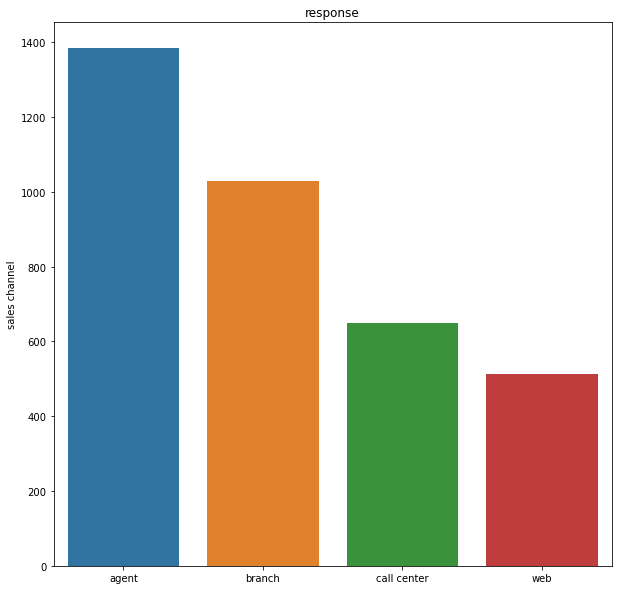

In [184]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('response')
#ax.plot(sales_const.index,sales_const)
sns.barplot(sales_const.index, sales_const)
#sns.catplot(x='response', y = 'sales channel', data = res_sales, col='class', row='alone', kind="box", margin_titles = True)


### Activity 5

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- Normalize (numericals)
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

- Bonus: split Data set into train and test sets



### Activity 6

#### Processing Data

(_Further processing..._)
- X-y split.
- Normalize (numerical). (_done_)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

#### Linear Regression

- Train-test split.
- Apply linear regression.

#### Model Validation

- Description:
  - MSE.
  - RMSE.
  - MAE.
  - R2.
